In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train_dir'
valid_path = '/content/drive/MyDrive/val_dir'


In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [ ]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/train_dir/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train_dir',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 9077 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/val_dir',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 938 images belonging to 7 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
142/142 [==============================] - 5035s 35s/step - loss: 0.9609 - accuracy: 0.6824 - val_loss: 0.5486 - val_accuracy: 0.8252
Epoch 2/50
142/142 [==============================] - 149s 1s/step - loss: 0.7356 - accuracy: 0.7393 - val_loss: 0.5221 - val_accuracy: 0.8326
Epoch 3/50
142/142 [==============================] - 145s 1s/step - loss: 0.6507 - accuracy: 0.7705 - val_loss: 0.4993 - val_accuracy: 0.8465
Epoch 4/50
142/142 [==============================] - 147s 1s/step - loss: 0.5854 - accuracy: 0.7961 - val_loss: 0.4838 - val_accuracy: 0.8475
Epoch 5/50
142/142 [==============================] - 148s 1s/step - loss: 0.5464 - accuracy: 0.8103 - val_loss: 0.4850 - val_accuracy: 0.8507
Epoch 6/50
142/142 [==============================] - 148s 1s/step - loss: 0.5106 - accuracy: 0.8228 - val_loss: 0.4984 - val_accuracy: 0.8443
Epoch 7/50
142/142 [==============================] - 147s 1s/step - loss: 0.4680 - accuracy: 0.8378 - val_loss: 0.4703 - val_accuracy: 0.85

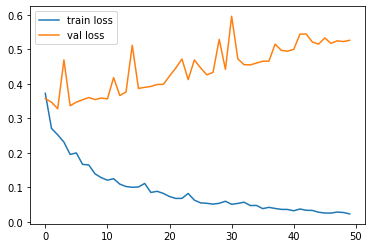

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_100epoch')

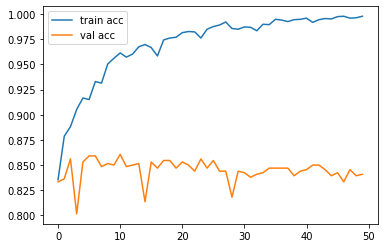

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_100epoch')


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_VGG16_100epoch.h5')

In [ ]:

y_pred = model.predict(test_generator)
y_pred

array([[0.9948532 , 0.00514676],
       [0.954738  , 0.04526198],
       [0.001079  , 0.99892104],
       ...,
       [0.05606136, 0.9439386 ],
       [0.877323  , 0.12267702],
       [0.0526055 , 0.9473945 ]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_VGG16.h5')

In [ ]:
#confusion matrix
#1.Predict classes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))
print(classification_report(test_generator.classes, predicted_classes))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


['benign', 'malignant']
[[156 204]
 [137 163]]
              precision    recall  f1-score   support

           0       0.53      0.43      0.48       360
           1       0.44      0.54      0.49       300

    accuracy                           0.48       660
   macro avg       0.49      0.49      0.48       660
weighted avg       0.49      0.48      0.48       660

